In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from xgcm import Grid

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [ ]:
## Reading in the 1/4 degree data and performing energy decomposition

In [2]:
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/
run=20 #1/4 degree NeverWorld2 setup
#run=26 #1/8 degree NeverWorld2 setup
#run=28 #1/16 degree NeverWorld2 setup
fs=xr.open_dataset('run%i/static.nc' % (run), decode_times=False)
os=xr.open_dataset('run%i/ocean.stats.nc' % (run), decode_times=False)
forcing=xr.open_dataset('run%i/forcing_00000500.nc' % (run), decode_times=False)
tau = 500*86400
end_time = 30500
start_time = end_time - tau/86400

sn     = xr.open_dataset('run%i/snapshots_000%i.nc' % (run, end_time-500+5), decode_times=False) #snapshot
av     = xr.open_dataset('run%i/averages_000%i.nc' % (run, end_time-500+2), decode_times=False)  #5-day average
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/
#print(av)

/glade/p/univ/unyu0004/neerajab/NeverWorld2
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [3]:
%%time
xh_025 = fs.xh.values
yh_025 = fs.yh.values
# #COMPUTE velocity components for decomposing KE:
Nlayers=15

grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av['h'].mean('time').fillna(0.)
Depth=h.sum('zl')
print('done part 1')
#Outputs are comprised of 100 5-day averages.
u  = av['u'];  u = grid.interp(u,axis='X')#.fillna(0.); 
ubar=u.mean('time')
print('done part 2')
v  = av['v'];  v = grid.interp(v,axis='Y')#.fillna(0.);
vbar=v.mean('time')

uprime=u-ubar
vprime=v-vbar

print(uprime.shape)
area_t=fs['area_t']

done part 1
done part 2
(100, 15, 560, 240)
CPU times: user 4.86 s, sys: 3.96 s, total: 8.81 s
Wall time: 29.6 s


In [4]:
%%time
# The mean BT and BC KE values:
ubar_TW=ubar*h/Depth; 
ubar_BT=ubar_TW.sum('zl')
ubar_BC=ubar-ubar_BT;

vbar_TW=vbar*h/Depth
vbar_BT=vbar_TW.sum('zl')
vbar_BC=vbar-vbar_BT;

KE_mean_BT=0.5*(vbar_BT**2+ubar_BT**2) #dim y,x
KE_mean_BC=(0.5*(vbar_BC**2+ubar_BC**2)*h/Depth).sum('zl') #dim y,x

print('done 1')

#Eddy BT and BC KE parts:
uprime_BT=(uprime*h/Depth).sum('zl')
uprime_BC=uprime-uprime_BT
vprime_BT=(vprime*h/Depth).sum('zl')
vprime_BC=vprime-vprime_BT
    
KE_eddy_BT=(0.5*(vprime_BT**2+uprime_BT**2)).mean('time')
KE_eddy_BC=((0.5*(vprime_BC**2+uprime_BC**2)*h/Depth).sum('zl')).mean('time')


# #Total kinetic energy:
KE_BT_tot_025=KE_eddy_BT+KE_mean_BT
KE_BC_tot_025=KE_eddy_BC+KE_mean_BC
KE_tot_025=KE_BT_tot_025+KE_BC_tot_025


fraction_BT_025=KE_BT_tot_025/KE_tot_025
fraction_BT_mean_025=KE_mean_BT/KE_tot_025
fraction_BT_eddy_025=KE_eddy_BT/KE_tot_025

fraction_BC_025=KE_BC_tot_025/KE_tot_025 #when you divide zero/zero it's a nan
fraction_BC_mean_025=KE_mean_BC/KE_tot_025
fraction_BC_eddy_025=KE_eddy_BC/KE_tot_025

KE_eddy_025 = KE_eddy_BT+ KE_eddy_BC
KE_mean_025 = KE_mean_BT+ KE_eddy_BC

done 1
CPU times: user 2.57 s, sys: 2.5 s, total: 5.07 s
Wall time: 5.07 s


## Reading in the 1/8 degree data and performing energy decomposition

In [10]:
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/
#run=20 #1/4 degree NeverWorld2 setup
run=26 #1/8 degree NeverWorld2 setup
#run=28 #1/16 degree NeverWorld2 setup
fs=xr.open_dataset('run%i/static.nc' % (run), decode_times=False)
os=xr.open_dataset('run%i/ocean.stats.nc' % (run), decode_times=False)
forcing=xr.open_dataset('run%i/forcing_00000500.nc' % (run), decode_times=False)
tau = 500*86400
end_time = 30500
start_time = end_time - tau/86400

sn     = xr.open_dataset('run%i/snapshots_000%i.nc' % (run, end_time-500+5), decode_times=False) #snapshot
av     = xr.open_dataset('run%i/averages_000%i.nc' % (run, end_time-500+2), decode_times=False)  #5-day average
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/
#print(av)

/glade/p/univ/unyu0004/neerajab/NeverWorld2
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [11]:
%%time
xh_0125 = fs.xh.values
yh_0125 = fs.yh.values
# #COMPUTE velocity components for decomposing KE:
Nlayers=15

grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av['h'].mean('time').fillna(0.)
Depth=h.sum('zl')
print('done part 1')
#Outputs are comprised of 100 5-day averages.
u  = av['u'];  u = grid.interp(u,axis='X')#.fillna(0.); 
ubar=u.mean('time')
print('done part 2')
v  = av['v'];  v = grid.interp(v,axis='Y')#.fillna(0.);
vbar=v.mean('time')

uprime=u-ubar
vprime=v-vbar

print(uprime.shape)
area_t=fs['area_t']

done part 1
done part 2
(100, 15, 1120, 480)
CPU times: user 20.2 s, sys: 14.9 s, total: 35.1 s
Wall time: 1min 26s


In [12]:
%%time
# The mean BT and BC KE values:
ubar_TW=ubar*h/Depth; 
ubar_BT=ubar_TW.sum('zl')
ubar_BC=ubar-ubar_BT;

vbar_TW=vbar*h/Depth
vbar_BT=vbar_TW.sum('zl')
vbar_BC=vbar-vbar_BT;

KE_mean_BT=0.5*(vbar_BT**2+ubar_BT**2) #dim y,x
KE_mean_BC=(0.5*(vbar_BC**2+ubar_BC**2)*h/Depth).sum('zl') #dim y,x

print('done 1')

#Eddy BT and BC KE parts:
uprime_BT=(uprime*h/Depth).sum('zl')
uprime_BC=uprime-uprime_BT
vprime_BT=(vprime*h/Depth).sum('zl')
vprime_BC=vprime-vprime_BT
    
KE_eddy_BT=(0.5*(vprime_BT**2+uprime_BT**2)).mean('time')
KE_eddy_BC=((0.5*(vprime_BC**2+uprime_BC**2)*h/Depth).sum('zl')).mean('time')


# #Total kinetic energy:
KE_BT_tot_0125=KE_eddy_BT+KE_mean_BT
KE_BC_tot_0125=KE_eddy_BC+KE_mean_BC
KE_tot_0125=KE_BT_tot_0125+KE_BC_tot_0125


fraction_BT_0125=KE_BT_tot_0125/KE_tot_0125
fraction_BT_mean_0125=KE_mean_BT/KE_tot_0125
fraction_BT_eddy_0125=KE_eddy_BT/KE_tot_0125

fraction_BC_0125=KE_BC_tot_0125/KE_tot_0125 #when you divide zero/zero it's a nan
fraction_BC_mean_0125=KE_mean_BC/KE_tot_0125
fraction_BC_eddy_0125=KE_eddy_BC/KE_tot_0125

KE_eddy_0125 = KE_eddy_BT+ KE_eddy_BC
KE_mean_0125 = KE_mean_BT+ KE_eddy_BC

done 1
CPU times: user 10.3 s, sys: 9.86 s, total: 20.2 s
Wall time: 20.2 s


In [13]:
fraction_BT_0125.shape

(1120, 480)

## Reading in the 1/16 degree data and performing energy decomposition

In [13]:
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/
#run=20 #1/4 degree NeverWorld2 setup
#run=26 #1/8 degree NeverWorld2 setup
run=28 #1/16 degree NeverWorld2 setup
fs=xr.open_dataset('run%i/static.nc' % (run), decode_times=False)
os=xr.open_dataset('run%i/ocean.stats.nc' % (run), decode_times=False)
forcing=xr.open_dataset('run%i/forcing_00000500.nc' % (run), decode_times=False)
tau = 500*86400
end_time = 30500
start_time = end_time - tau/86400

sn     = xr.open_dataset('run%i/snapshots_000%i.nc' % (run, end_time-500+5), decode_times=False) #snapshot
av     = xr.open_dataset('run%i/averages_000%i.nc' % (run, end_time-500+2), decode_times=False)  #5-day average
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/
#print(av)

/glade/p/univ/unyu0004/neerajab/NeverWorld2
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [14]:
%%time
#COMPUTE KE AND THEN WEIGH BY THICKNESS
xh_00625 = fs.xh.values
yh_00625 = fs.yh.values

# #COMPUTE velocity components for decomposing KE:
Nlayers=15

grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av['h'].mean('time').fillna(0.)
Depth=h.sum('zl')
print('done part 1')
#Outputs are comprised of 100 5-day averages.
u  = av['u'];  u = grid.interp(u,axis='X')#.fillna(0.); 
ubar=u.mean('time')
print('done part 2')
v  = av['v'];  v = grid.interp(v,axis='Y')#.fillna(0.);
vbar=v.mean('time')

uprime=u-ubar
vprime=v-vbar

print(uprime.shape)
area_t=fs['area_t']

KeyboardInterrupt: 

In [15]:
%%time
# The mean BT and BC KE values:
ubar_TW=ubar*h/Depth; 
ubar_BT=ubar_TW.sum('zl')
ubar_BC=ubar-ubar_BT;

vbar_TW=vbar*h/Depth
vbar_BT=vbar_TW.sum('zl')
vbar_BC=vbar-vbar_BT;

KE_mean_BT=0.5*(vbar_BT**2+ubar_BT**2) #dim y,x
KE_mean_BC=(0.5*(vbar_BC**2+ubar_BC**2)*h/Depth).sum('zl') #dim y,x

print('done 1')

#Eddy BT and BC KE parts:
uprime_BT=(uprime*h/Depth).sum('zl')
uprime_BC=uprime-uprime_BT
vprime_BT=(vprime*h/Depth).sum('zl')
vprime_BC=vprime-vprime_BT
    
KE_eddy_BT=(0.5*(vprime_BT**2+uprime_BT**2)).mean('time')
KE_eddy_BC=((0.5*(vprime_BC**2+uprime_BC**2)*h/Depth).sum('zl')).mean('time')


# #Total kinetic energy:
KE_BT_tot_00625=KE_eddy_BT+KE_mean_BT
KE_BC_tot_00625=KE_eddy_BC+KE_mean_BC
KE_tot_00625=KE_BT_tot_00625+KE_BC_tot_00625


fraction_BT_00625=KE_BT_tot_00625/KE_tot_00625
fraction_BT_mean_00625=KE_mean_BT/KE_tot_00625
fraction_BT_eddy_00625=KE_eddy_BT/KE_tot_00625

fraction_BC_00625=KE_BC_tot_00625/KE_tot_00625 #when you divide zero/zero it's a nan
fraction_BC_mean_00625=KE_mean_BC/KE_tot_00625
fraction_BC_eddy_00625=KE_eddy_BC/KE_tot_00625

KE_eddy_00625 = KE_eddy_BT+ KE_eddy_BC
KE_mean_00625 = KE_mean_BT+ KE_eddy_BC

done 1
CPU times: user 88.5 ms, sys: 2.64 ms, total: 91.1 ms
Wall time: 90.2 ms


In [18]:
KE_mean_00625.shape

(2240, 960)

## Reading in the 1/32 degree data and performing energy decomposition

In [6]:
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/
run=33; factor = 1440/86400 #1/32 degree NeverWorld setup
fs=xr.open_dataset('run%i/static.nc' % (run), decode_times=False,decode_cf=False)
os=xr.open_dataset('run%i/ocean.stats.nc' % (run), decode_times=False,decode_cf=False)
forcing=xr.open_dataset('run%i/forcing_00002000.nc' % (run), decode_times=False,decode_cf=False)
init=xr.open_dataset('run33/MOM_IC.nc', decode_times=False,decode_cf=False)
av=xr.open_mfdataset('run33/averages_0000*02.nc',decode_times=False)
#av=xr.open_dataset('run33/averages_00001502.nc',decode_times=False,decode_cf=False)#,decode_cf=False)
# print(av)
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/neerajab/NeverWorld2
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [7]:
%%time
#COMPUTE KE AND THEN WEIGH BY THICKNESS
xh_003125 = fs.xh.values
yh_003125 = fs.yh.values

# #COMPUTE velocity components for decomposing KE:
Nlayers=15

grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av['h'][0:20,:].mean('time')#.compute().fillna(0.)
Depth=h.sum('zl')
print('done part 1')
#Outputs are comprised of 100 5-day averages.
u  = av['u'][0:20,:];  u = grid.interp(u,axis='X')#.fillna(0.); 
ubar=u.mean('time')
print('done part 2')
v  = av['v'][0:20,:];  v = grid.interp(v,axis='Y')#.fillna(0.);
vbar=v.mean('time')

uprime=u-ubar
vprime=v-vbar

print(uprime.shape)
area_t=fs['area_t']

done part 1
done part 2
(20, 15, 4480, 1920)
CPU times: user 25.5 ms, sys: 7.39 ms, total: 32.9 ms
Wall time: 34 ms


In [8]:
av.u

<xarray.DataArray 'u' (time: 200, zl: 15, yh: 4480, xq: 1921)>
dask.array<concatenate, shape=(200, 15, 4480, 1921), dtype=float32, chunksize=(20, 15, 4480, 1921), chunktype=numpy.ndarray>
Coordinates:
  * xq       (xq) float64 0.0 0.03125 0.0625 0.09375 ... 59.91 59.94 59.97 60.0
  * yh       (yh) float64 -69.98 -69.95 -69.92 -69.89 ... 69.92 69.95 69.98
  * zl       (zl) float64 1.023e+03 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
  * time     (time) float64 1.002e+03 1.008e+03 ... 1.992e+03 1.998e+03
Attributes:
    long_name:      Zonal velocity
    units:          m s-1
    cell_methods:   zl:mean yh:mean xq:point time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  none

In [9]:
%%time
# The mean BT and BC KE values:
ubar_TW=ubar*h/Depth; 
ubar_BT=ubar_TW.sum('zl')
ubar_BC=ubar-ubar_BT;

vbar_TW=vbar*h/Depth
vbar_BT=vbar_TW.sum('zl')
vbar_BC=vbar-vbar_BT;

KE_mean_BT=0.5*(vbar_BT**2+ubar_BT**2) #dim y,x
KE_mean_BC=(0.5*(vbar_BC**2+ubar_BC**2)*h/Depth).sum('zl') #dim y,x

print('done 1')

#Eddy BT and BC KE parts:
uprime_BT=(uprime*h/Depth).sum('zl')
uprime_BC=uprime-uprime_BT
vprime_BT=(vprime*h/Depth).sum('zl')
vprime_BC=vprime-vprime_BT
    
KE_eddy_BT=(0.5*(vprime_BT**2+uprime_BT**2)).mean('time')
KE_eddy_BC=((0.5*(vprime_BC**2+uprime_BC**2)*h/Depth).sum('zl')).mean('time')


# #Total kinetic energy:
KE_BT_tot_003125=KE_eddy_BT+KE_mean_BT
KE_BC_tot_003125=KE_eddy_BC+KE_mean_BC
KE_tot_003125=KE_BT_tot_003125+KE_BC_tot_003125


fraction_BT_003125=KE_BT_tot_003125/KE_tot_003125
fraction_BT_mean_003125=KE_mean_BT/KE_tot_003125
fraction_BT_eddy_003125=KE_eddy_BT/KE_tot_003125

fraction_BC_003125=KE_BC_tot_003125/KE_tot_003125 #when you divide zero/zero it's a nan
fraction_BC_mean_003125=KE_mean_BC/KE_tot_003125
fraction_BC_eddy_003125=KE_eddy_BC/KE_tot_003125

KE_eddy_003125 = KE_eddy_BT+ KE_eddy_BC
KE_mean_003125 = KE_mean_BT+ KE_eddy_BC

done 1
CPU times: user 83.7 ms, sys: 6.58 ms, total: 90.3 ms
Wall time: 89.5 ms


done


Text(0.5, 1.0, '1/32$^\\circ$ KE Fractions')

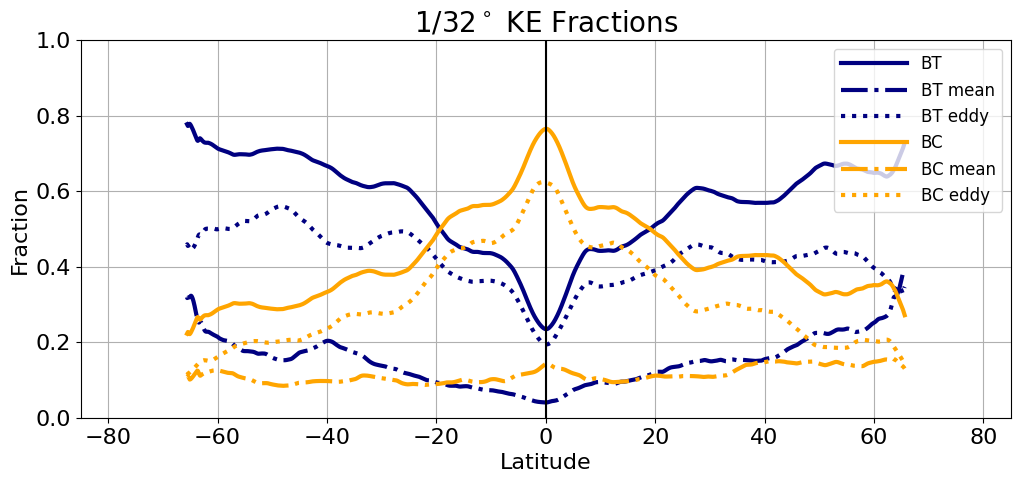

In [12]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.
window=240

plt.figure(figsize=(12, 5), dpi= 100, facecolor='w', edgecolor='k')
#plt.plot(yh,np.nanmean(fraction_BT,axis=1),'-',c='#82cafc',linewidth=3)
plt.plot(yh_003125,np.convolve((fraction_BT_003125.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3)
print('done')
plt.plot(yh_003125,np.convolve((fraction_BT_mean_003125.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-.',c=[0,0,0.5],linewidth=3)
plt.plot(yh_003125,np.convolve((fraction_BT_eddy_003125.mean('xh').compute()), np.ones((window,))/window, mode='same'),':',c=[0,0,0.5],linewidth=3)
plt.grid()
plt.plot(yh_003125,np.convolve((fraction_BC_003125.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
plt.plot(yh_003125,np.convolve((fraction_BC_mean_003125.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-.',c='#FFA500',linewidth=3)
plt.plot(yh_003125,np.convolve((fraction_BC_eddy_003125.mean('xh').compute()), np.ones((window,))/window, mode='same'),':',c='#FFA500',linewidth=3)

plt.legend(['BT','BT mean','BT eddy','BC','BC mean','BC eddy'],loc='upper right',fontsize=12,handlelength=4)
plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
plt.xlim(-85, 85); plt.xticks(fontsize=16);
plt.ylim(0,1); plt.yticks(fontsize=16);
plt.xlabel('Latitude',fontsize=16)
plt.ylabel('Fraction',fontsize=16)
plt.title('1/32$^\circ$ KE Fractions',fontsize=20)

done


Text(0.5, 1.0, '1/4$^\\circ$ KE Fractions')

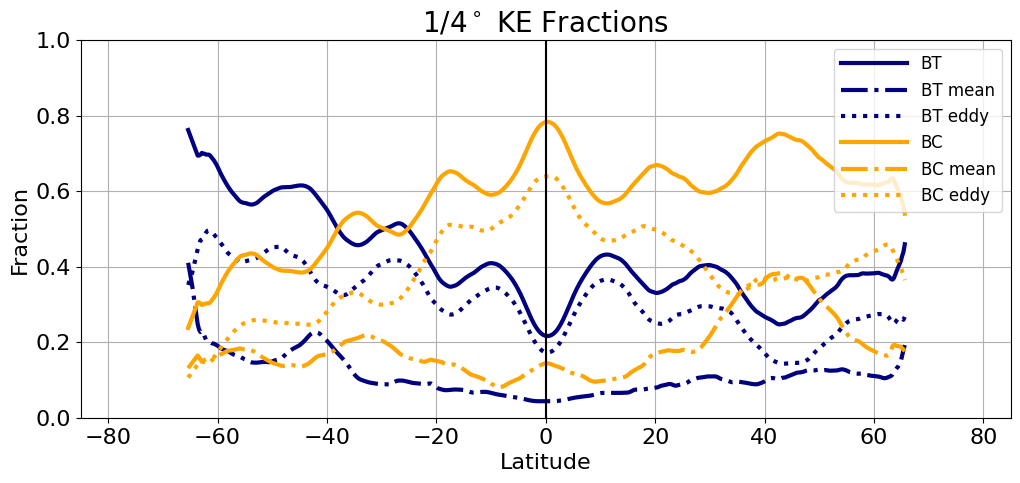

In [11]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.
window=30

plt.figure(figsize=(12, 5), dpi= 100, facecolor='w', edgecolor='k')
#plt.plot(yh,np.nanmean(fraction_BT,axis=1),'-',c='#82cafc',linewidth=3)
plt.plot(yh_025,np.convolve((fraction_BT_025.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3)
print('done')
plt.plot(yh_025,np.convolve((fraction_BT_mean_025.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-.',c=[0,0,0.5],linewidth=3)
plt.plot(yh_025,np.convolve((fraction_BT_eddy_025.mean('xh').compute()), np.ones((window,))/window, mode='same'),':',c=[0,0,0.5],linewidth=3)
plt.grid()
plt.plot(yh_025,np.convolve((fraction_BC_025.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
plt.plot(yh_025,np.convolve((fraction_BC_mean_025.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-.',c='#FFA500',linewidth=3)
plt.plot(yh_025,np.convolve((fraction_BC_eddy_025.mean('xh').compute()), np.ones((window,))/window, mode='same'),':',c='#FFA500',linewidth=3)

plt.legend(['BT','BT mean','BT eddy','BC','BC mean','BC eddy'],loc='upper right',fontsize=12,handlelength=4)
plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
plt.xlim(-85, 85); plt.xticks(fontsize=16);
plt.ylim(0,1); plt.yticks(fontsize=16);
plt.xlabel('Latitude',fontsize=16)
plt.ylabel('Fraction',fontsize=16)
plt.title('1/4$^\circ$ KE Fractions',fontsize=20)